In [1]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# load data
df =pd.read_csv('hotel_booking.csv')

In [3]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,2015-07-01,Ernest Barnes,Ernest.Barnes31@outlook.com,669-792-1661,************4322
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,2015-07-01,Andrea Baker,Andrea_Baker94@aol.com,858-637-6955,************9157
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,2015-07-02,Rebecca Parker,Rebecca_Parker@comcast.net,652-885-2745,************3734
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,2015-07-02,Laura Murray,Laura_M@gmail.com,364-656-8427,************5677
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,Transient,98.0,0,1,Check-Out,2015-07-03,Linda Hines,LHines@verizon.com,713-226-5883,************5498


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 36 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [5]:
# check for missing values
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [6]:
# handle missing values
# Handle missing values for numerical data
df['children'].fillna(df['children'].mean(), inplace=True)
df['agent'].fillna(df['agent'].median(), inplace=True)
df['company'].fillna(df['company'].median(), inplace=True)

# Handle missing values for categorical data
df['country'].fillna(df['country'].mode()[0], inplace=True)
df['meal'].fillna('Missing', inplace=True)

In [7]:
# check missing values again
df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr                         

In [8]:
# check duplicates
df.duplicated().sum()

np.int64(0)

In [9]:
# remove duplicates
df.drop_duplicates(inplace=True)

In [10]:
# check inconsistencies
# Standardize date formats
df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'])

# Standardize text case consistency
df['hotel'] = df['hotel'].str.title()
df['meal'] = df['meal'].str.upper()
df['country'] = df['country'].str.upper()
df['market_segment'] = df['market_segment'].str.title()
df['distribution_channel'] = df['distribution_channel'].str.title()
df['reserved_room_type'] = df['reserved_room_type'].str.upper()
df['assigned_room_type'] = df['assigned_room_type'].str.upper()
df['customer_type'] = df['customer_type'].str.title()
df['reservation_status'] = df['reservation_status'].str.title()

# Standardize column naming
df.columns = [col.lower() for col in df.columns]

# Validate data quality
# Check for data type mismatches
print(df.dtypes)

# Check for unexpected categories or values in categorical data
categorical_columns = ['hotel', 'meal', 'country', 'market_segment', 'distribution_channel', 'reserved_room_type', 'assigned_room_type', 'customer_type', 'reservation_status']
for col in categorical_columns:
    print(f"Unique values in {col}: {df[col].unique()}")

# Check consistency across related columns
# Example: Check if 'reserved_room_type' and 'assigned_room_type' have consistent values
inconsistent_room_types = df[df['reserved_room_type'] != df['assigned_room_type']]
print(f"Inconsistent room types: {len(inconsistent_room_types)}")

hotel                                     object
is_canceled                                int64
lead_time                                  int64
arrival_date_year                          int64
arrival_date_month                        object
arrival_date_week_number                   int64
arrival_date_day_of_month                  int64
stays_in_weekend_nights                    int64
stays_in_week_nights                       int64
adults                                     int64
children                                 float64
babies                                     int64
meal                                      object
country                                   object
market_segment                            object
distribution_channel                      object
is_repeated_guest                          int64
previous_cancellations                     int64
previous_bookings_not_canceled             int64
reserved_room_type                        object
assigned_room_type  

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 36 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   hotel                           119390 non-null  object        
 1   is_canceled                     119390 non-null  int64         
 2   lead_time                       119390 non-null  int64         
 3   arrival_date_year               119390 non-null  int64         
 4   arrival_date_month              119390 non-null  object        
 5   arrival_date_week_number        119390 non-null  int64         
 6   arrival_date_day_of_month       119390 non-null  int64         
 7   stays_in_weekend_nights         119390 non-null  int64         
 8   stays_in_week_nights            119390 non-null  int64         
 9   adults                          119390 non-null  int64         
 10  children                        119390 non-null  float64

In [12]:
# draw graphs for customers in each year, month and day of the week so as to know the best time to market the hotel
# Extract year, month, and day of the week from 'reservation_status_date'
df['year'] = df['reservation_status_date'].dt.year
df['month'] = df['reservation_status_date'].dt.month
df['day_of_week'] = df['reservation_status_date'].dt.day_name()


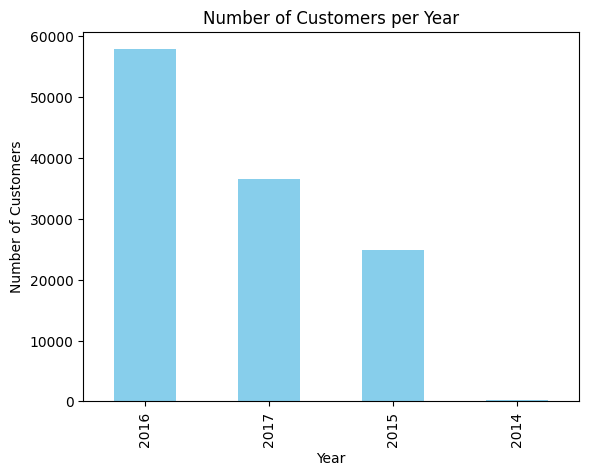

In [ ]:
# Find number of customers that visits per year
df['year'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Number of Customers per Year')
plt.xlabel('Year')
plt.ylabel('Number of Customers')
plt.show()


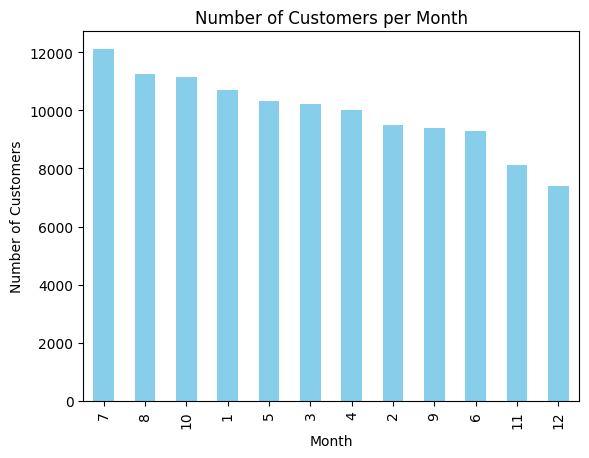

In [14]:
# Plot the number of customers per month
df['month'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Number of Customers per Month')
plt.xlabel('Month')
plt.ylabel('Number of Customers')
plt.show()


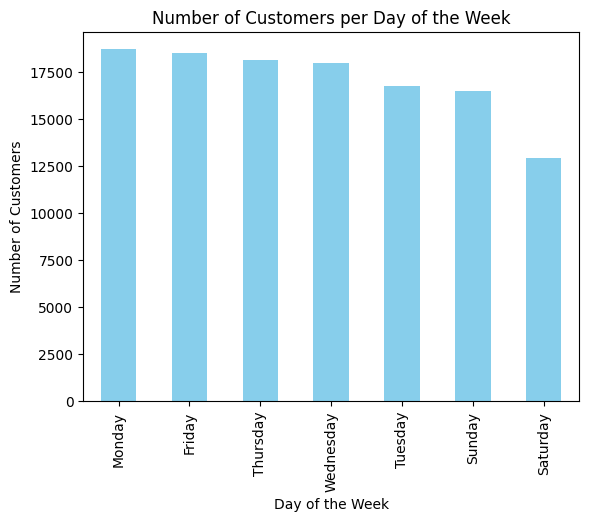

In [15]:
# Plot the number of customers per day of the week
df['day_of_week'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Number of Customers per Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Customers')
plt.show()


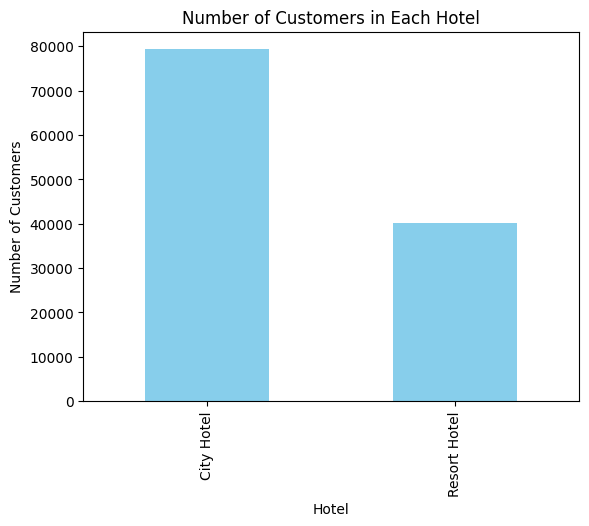

In [16]:
# draw graphs for the number of customers in each hotel
df['hotel'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Number of Customers in Each Hotel')
plt.xlabel('Hotel')
plt.ylabel('Number of Customers')
plt.show()


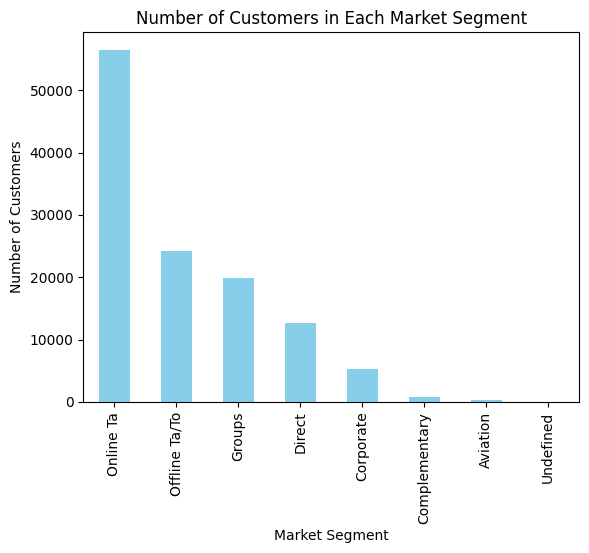

In [17]:
# draw graphs for the number of customers in each market segment
df['market_segment'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Number of Customers in Each Market Segment')
plt.xlabel('Market Segment')
plt.ylabel('Number of Customers')
plt.show()


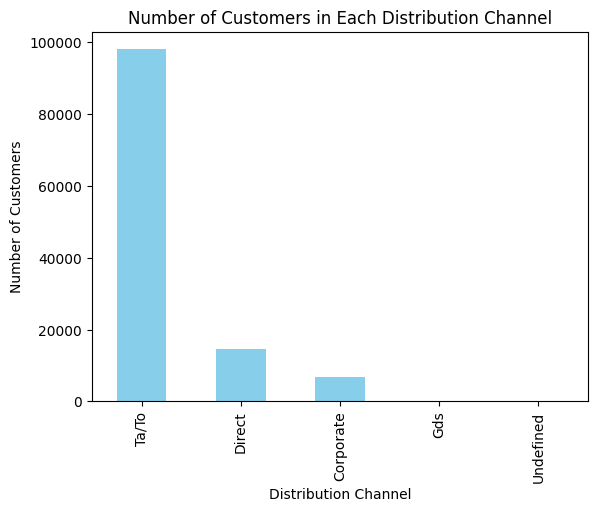

In [18]:
# draw graphs for the number of customers in each distribution channel
df['distribution_channel'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Number of Customers in Each Distribution Channel')
plt.xlabel('Distribution Channel')
plt.ylabel('Number of Customers')
plt.show()


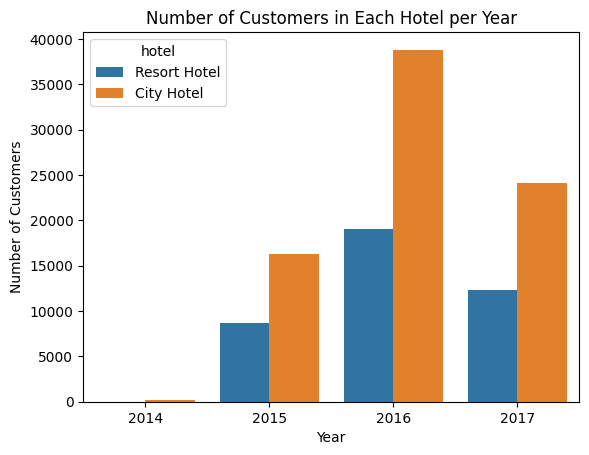

In [ ]:

# Plot the number of customers in each hotel per year
sns.countplot(data=df, x='year', hue='hotel')
plt.title('Number of Customers in Each Hotel per Year')
plt.xlabel('Year')
plt.ylabel('Number of Customers')
plt.show()


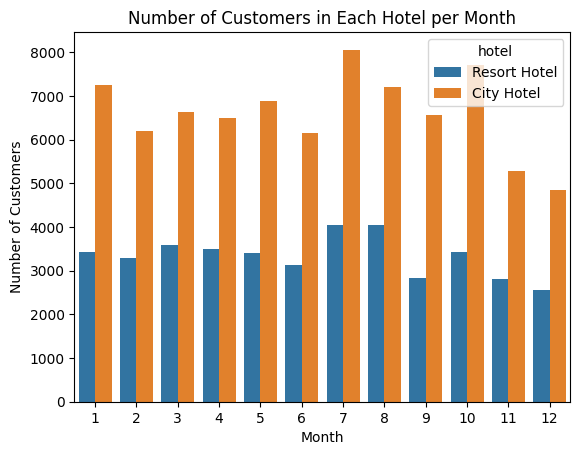

In [20]:
# Plot the number of customers in each hotel per month
sns.countplot(data=df, x='month', hue='hotel')
plt.title('Number of Customers in Each Hotel per Month')
plt.xlabel('Month')
plt.ylabel('Number of Customers')
plt.show()


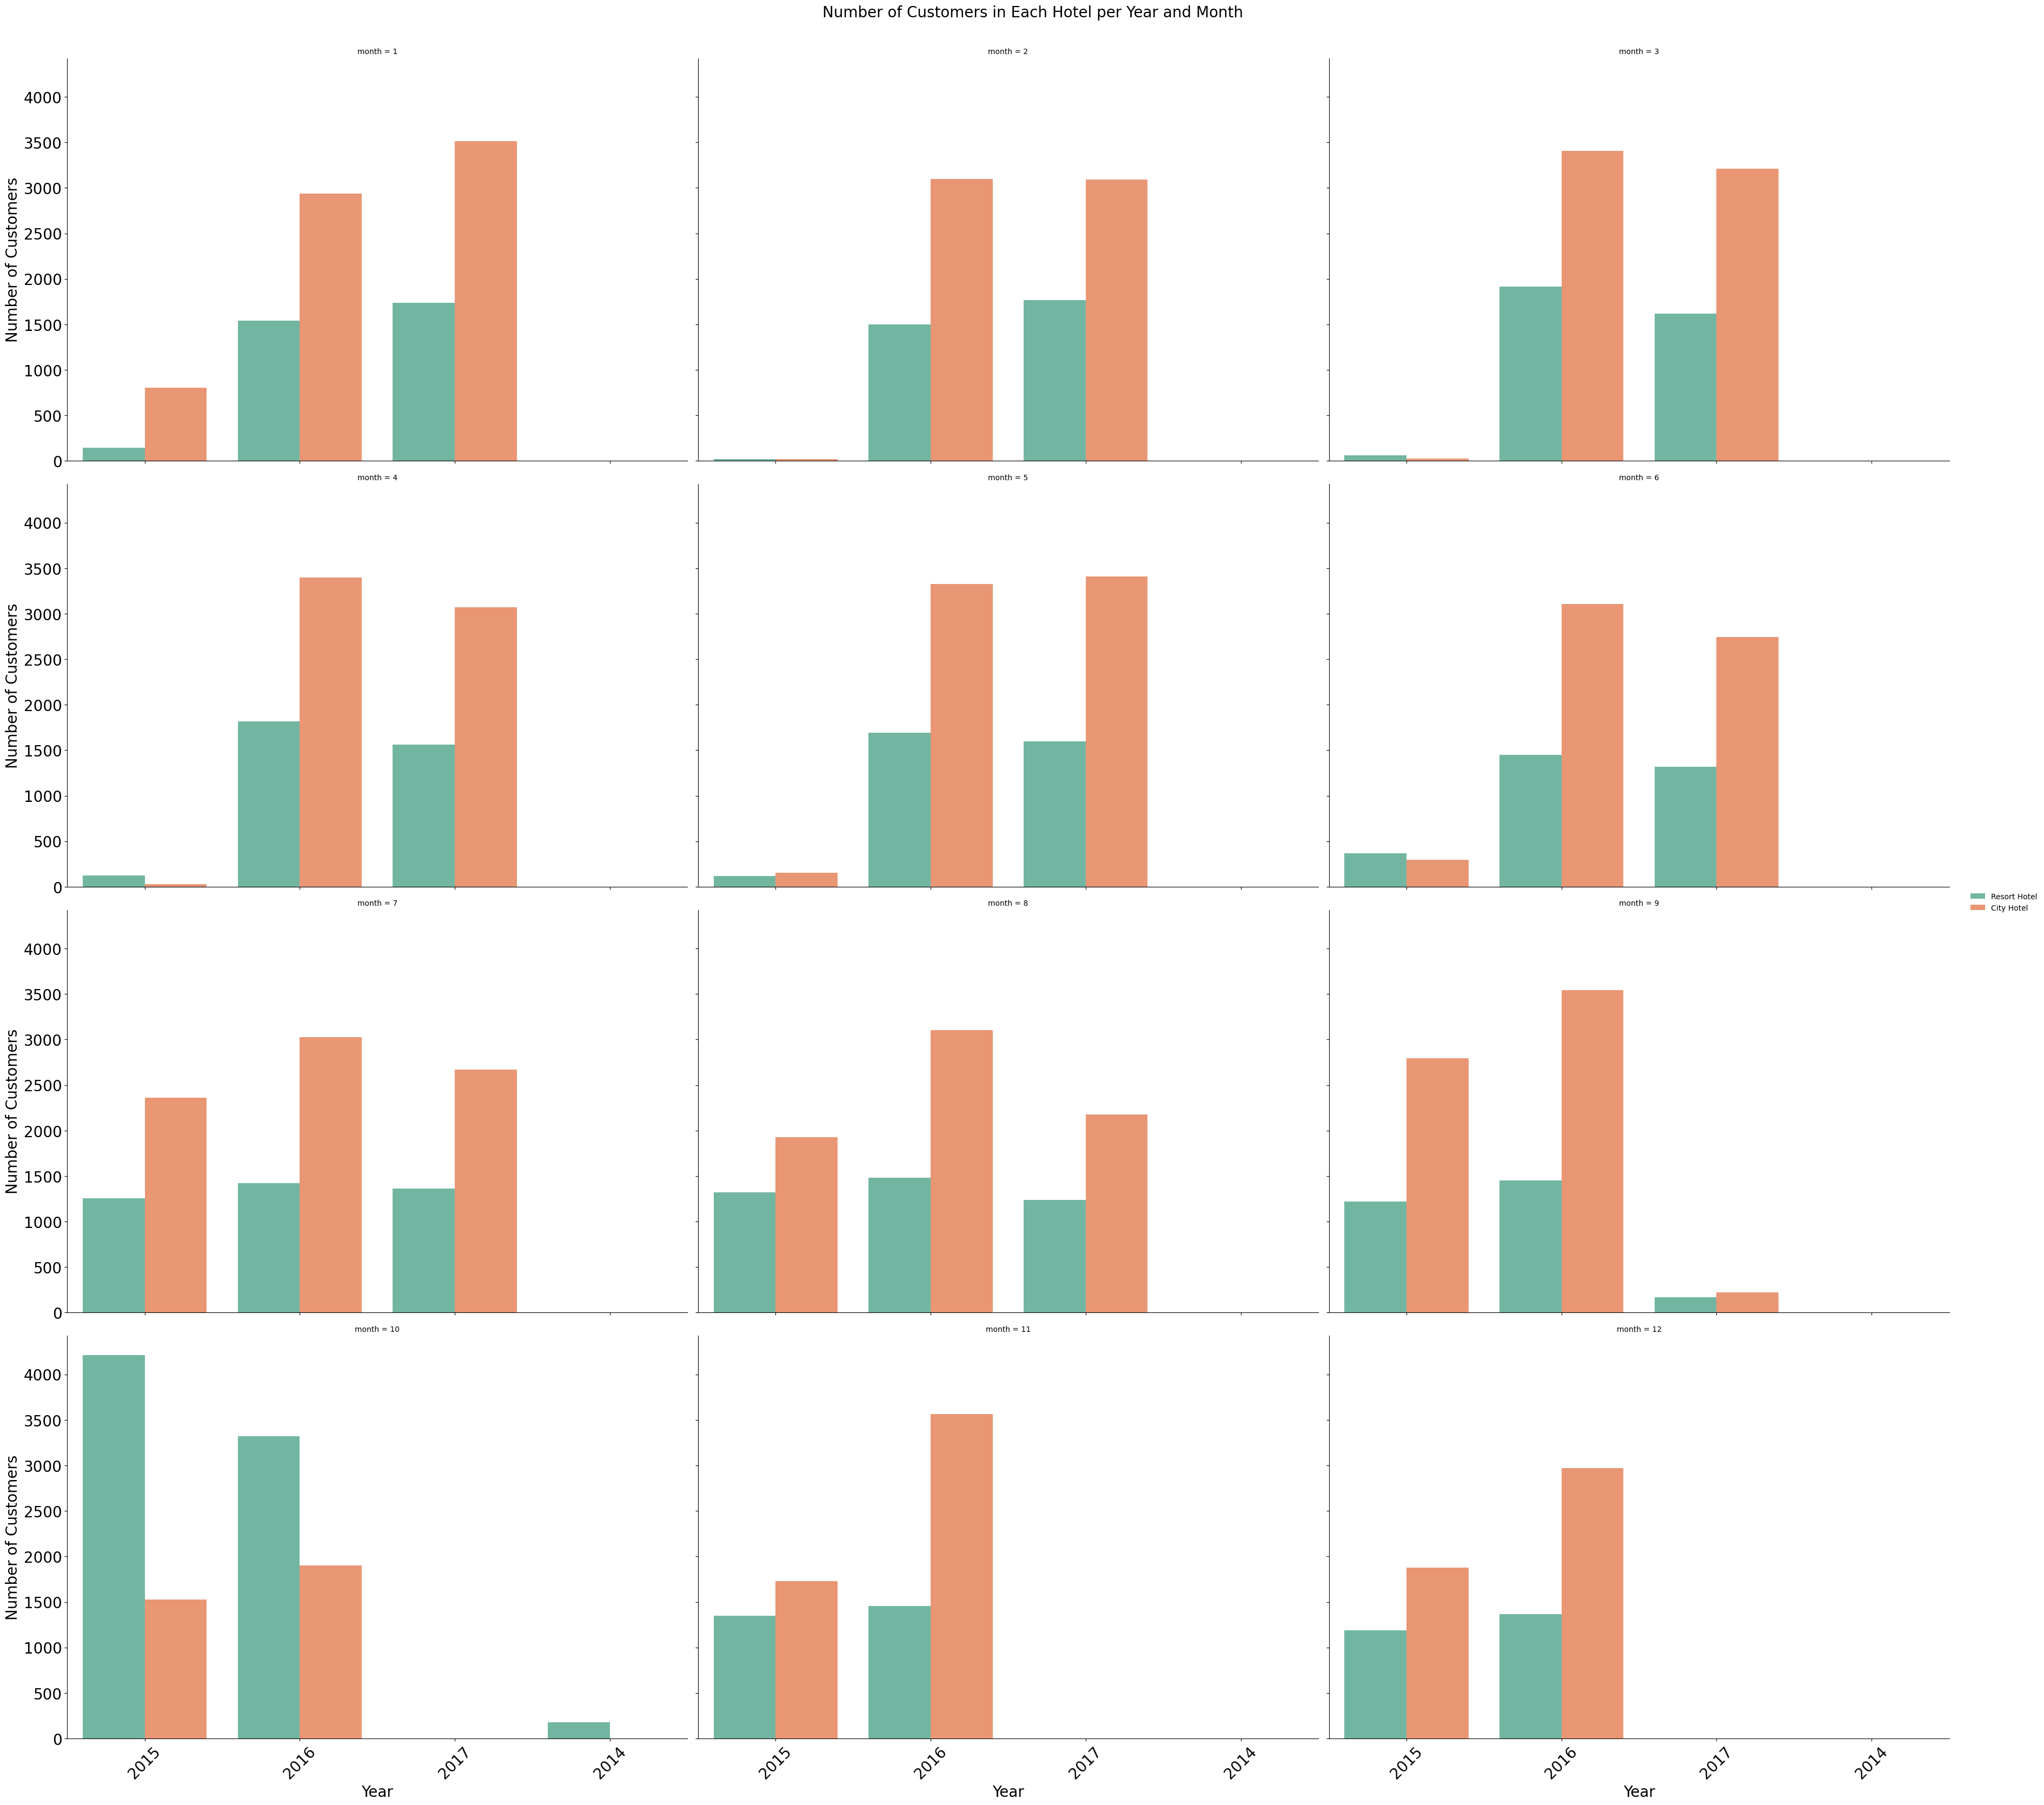

In [56]:
# mutlivariate analysis
# Plot the number of customers in each hotel per year and month
g = sns.FacetGrid(df, col='month', col_wrap=3, height=8, aspect=1.5)
g.map_dataframe(sns.countplot, x='year', hue='hotel', palette='Set2')
g.add_legend()

# Increase font size for titles and labels
for ax in g.axes:
    ax.set_xlabel('Year', fontsize=20)
    ax.set_ylabel('Number of Customers', fontsize=20)
    ax.tick_params(labelsize=20)
    plt.setp(ax.get_xticklabels(), rotation=45)

plt.suptitle('Number of Customers in Each Hotel per Year and Month', y=1.02, fontsize=20)
plt.show()


         is_canceled      lead_time  arrival_date_year  \
count  119390.000000  119390.000000      119390.000000   
mean        0.370416     104.011416        2016.156554   
min         0.000000       0.000000        2015.000000   
25%         0.000000      18.000000        2016.000000   
50%         0.000000      69.000000        2016.000000   
75%         1.000000     160.000000        2017.000000   
max         1.000000     737.000000        2017.000000   
std         0.482918     106.863097           0.707476   

       arrival_date_week_number  arrival_date_day_of_month  \
count             119390.000000              119390.000000   
mean                  27.165173                  15.798241   
min                    1.000000                   1.000000   
25%                   16.000000                   8.000000   
50%                   28.000000                  16.000000   
75%                   38.000000                  23.000000   
max                   53.000000            

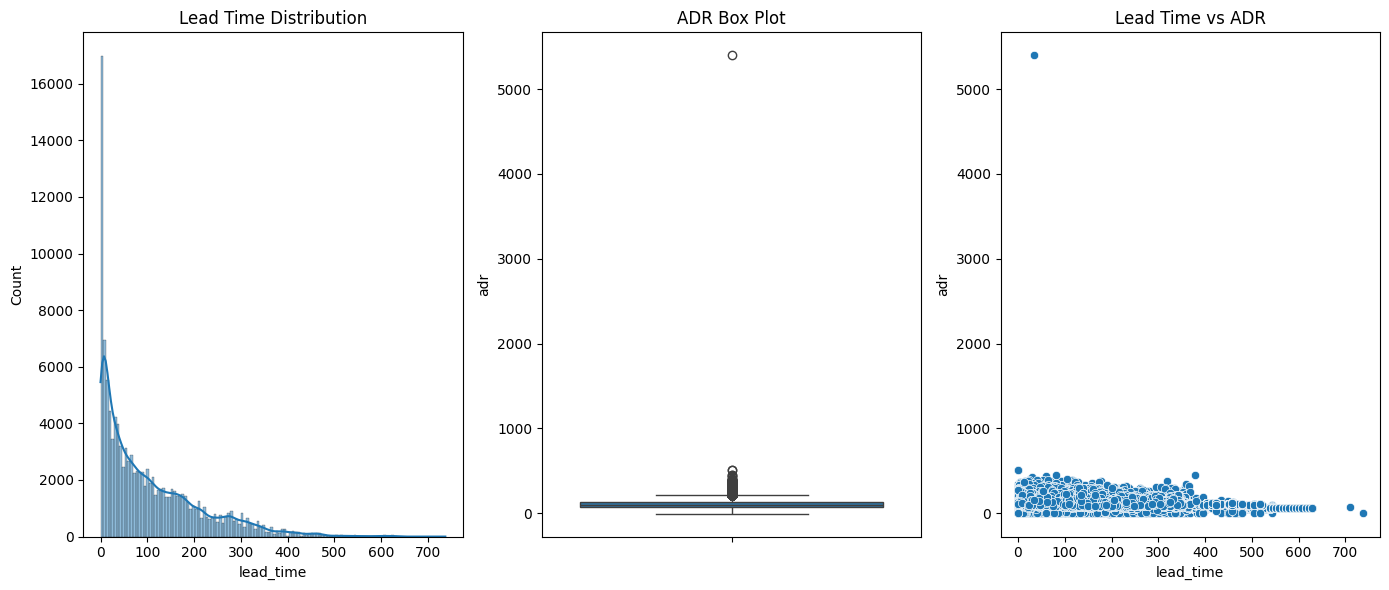

             hotel    meal country market_segment distribution_channel  \
count       119390  119390  119390         119390               119390   
unique           2       5     177              8                    5   
top     City Hotel      BB     PRT      Online Ta                Ta/To   
freq         79330   92310   49078          56477                97870   

       reserved_room_type assigned_room_type customer_type reservation_status  
count              119390             119390        119390             119390  
unique                 10                 12             4                  3  
top                     A                  A     Transient          Check-Out  
freq                85994              74053         89613              75166  


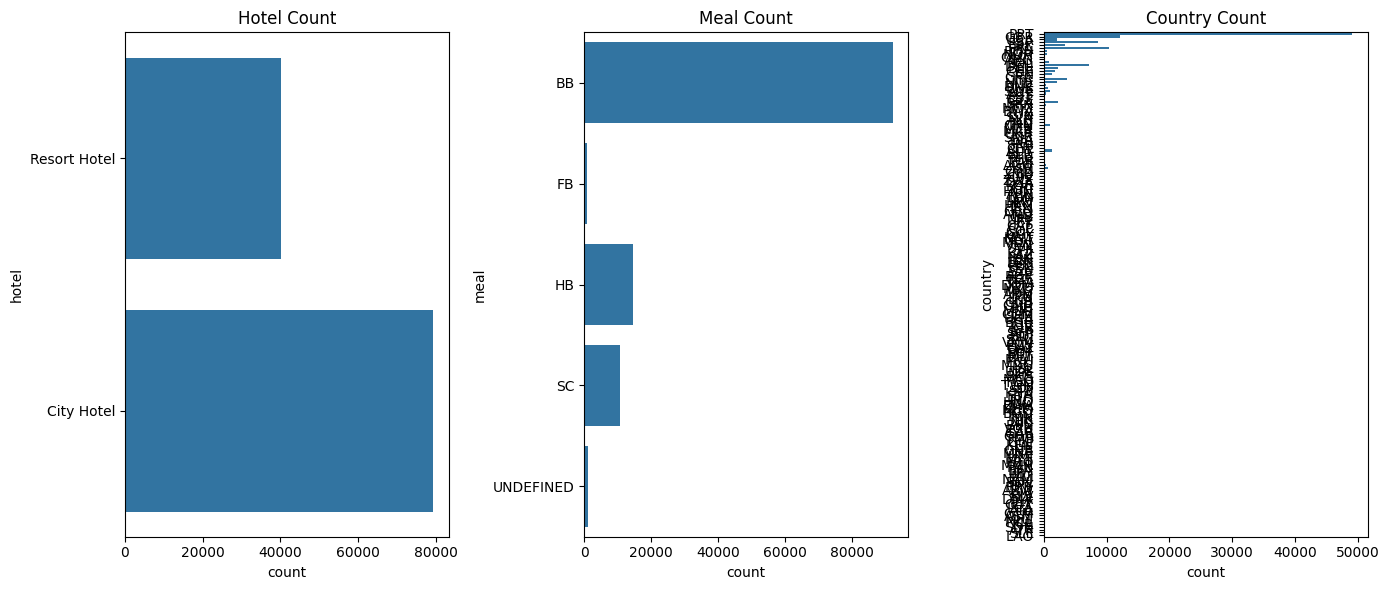

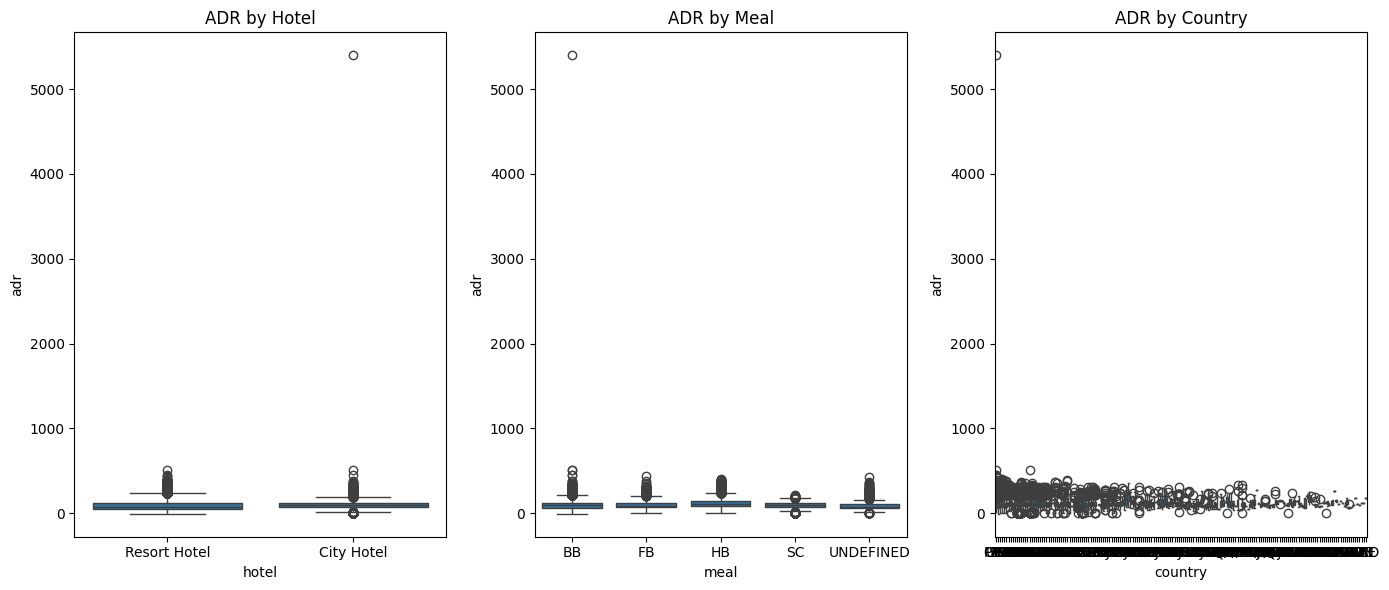

Number of outliers detected: 27126


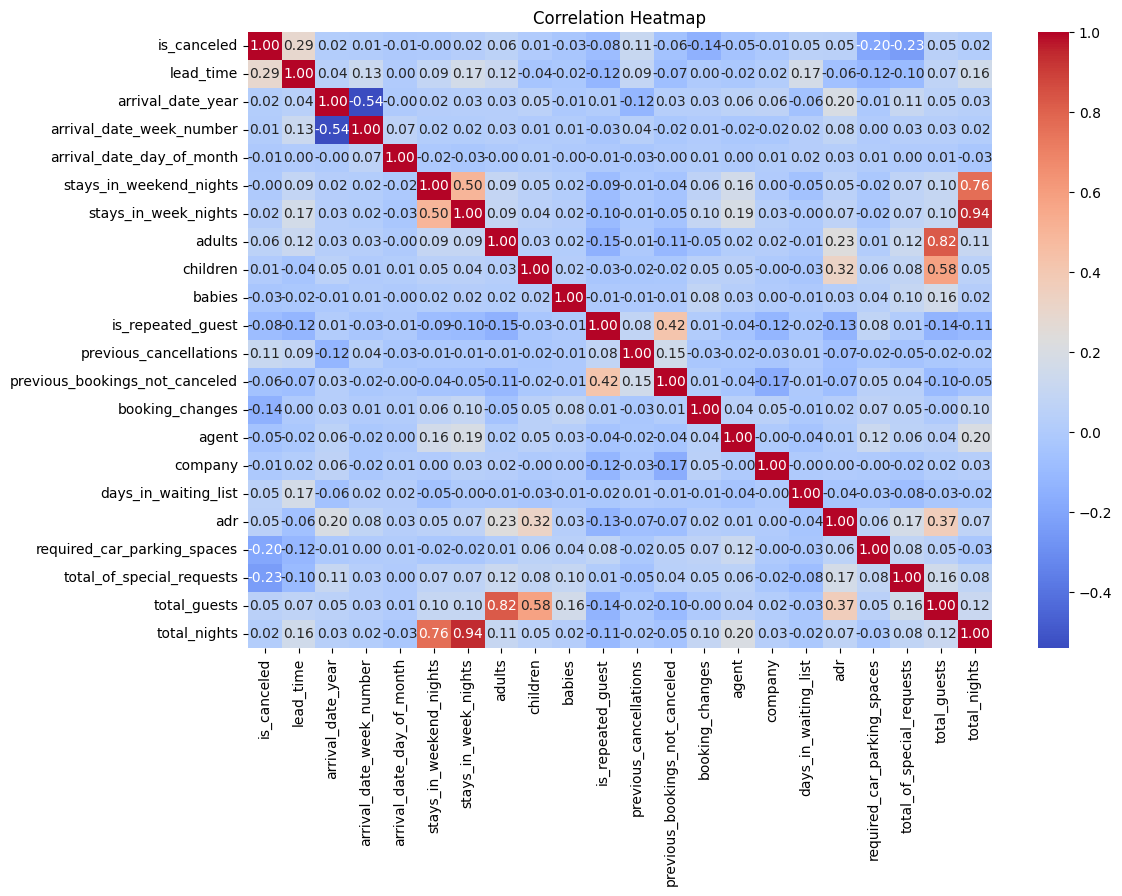

In [26]:
# Exploratory Data Analysis
from scipy.stats import zscore

# Numerical Data
# Calculate summary statistics
numerical_summary = df.describe()
print(numerical_summary)

# Create visualizations for numerical data
plt.figure(figsize=(14, 6))
plt.subplot(1, 3, 1)
sns.histplot(df['lead_time'], kde=True)
plt.title('Lead Time Distribution')

plt.subplot(1, 3, 2)
sns.boxplot(y=df['adr'])
plt.title('ADR Box Plot')

plt.subplot(1, 3, 3)
sns.scatterplot(x=df['lead_time'], y=df['adr'])
plt.title('Lead Time vs ADR')

plt.tight_layout()
plt.show()

# Categorical Data
# Count frequency of categories
categorical_summary = df[categorical_columns].describe()
print(categorical_summary)

# Visualize categorical data
plt.figure(figsize=(14, 6))
for i, col in enumerate(categorical_columns[:3]):
    plt.subplot(1, 3, i+1)
    sns.countplot(y=df[col])
    plt.title(f'{col.capitalize()} Count')

plt.tight_layout()
plt.show()

# Identify correlations between categorical and numerical data
plt.figure(figsize=(14, 6))
for i, col in enumerate(categorical_columns[:3]):
    plt.subplot(1, 3, i+1)
    sns.boxplot(x=df[col], y=df['adr'])
    plt.title(f'ADR by {col.capitalize()}')

plt.tight_layout()
plt.show()

# Detect outliers using Z-score

numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
z_scores = np.abs(zscore(df[numerical_columns]))
outliers = (z_scores > 3).any(axis=1)
print(f'Number of outliers detected: {outliers.sum()}')

# Generate heatmap for correlations among numerical variables
plt.figure(figsize=(12, 8))
correlation_matrix = df[numerical_columns].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()


In [27]:
# Remove outliers by IQR method
Q1 = df[numerical_columns].quantile(0.25)
Q3 = df[numerical_columns].quantile(0.75)
IQR = Q3 - Q1
df_no_outliers = df[~((df[numerical_columns] < (Q1 - 1.5 * IQR)) | (df[numerical_columns] > (Q3 + 1.5 * IQR))).any(axis=1)] 


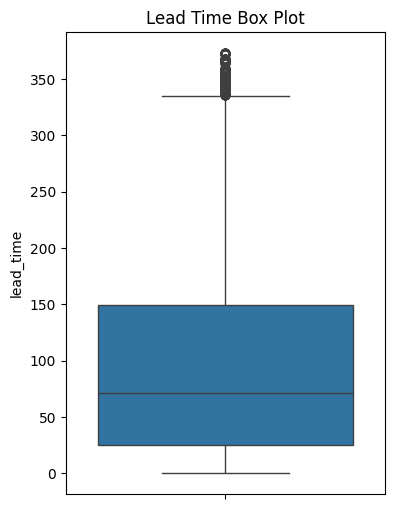

In [28]:
# boxplot to check outliers
plt.figure(figsize=(14, 6))
plt.subplot(1, 3, 1)
sns.boxplot(y=df_no_outliers['lead_time'])
plt.title('Lead Time Box Plot')
plt.show()

In [23]:
# Feature Engineering
# Create new features based on existing data
df['total_guests'] = df['adults'] + df['children'] + df['babies']
df['total_nights'] = df['stays_in_weekend_nights'] + df['stays_in_week_nights']


Text(0.5, 1.0, 'Total Nights vs ADR')

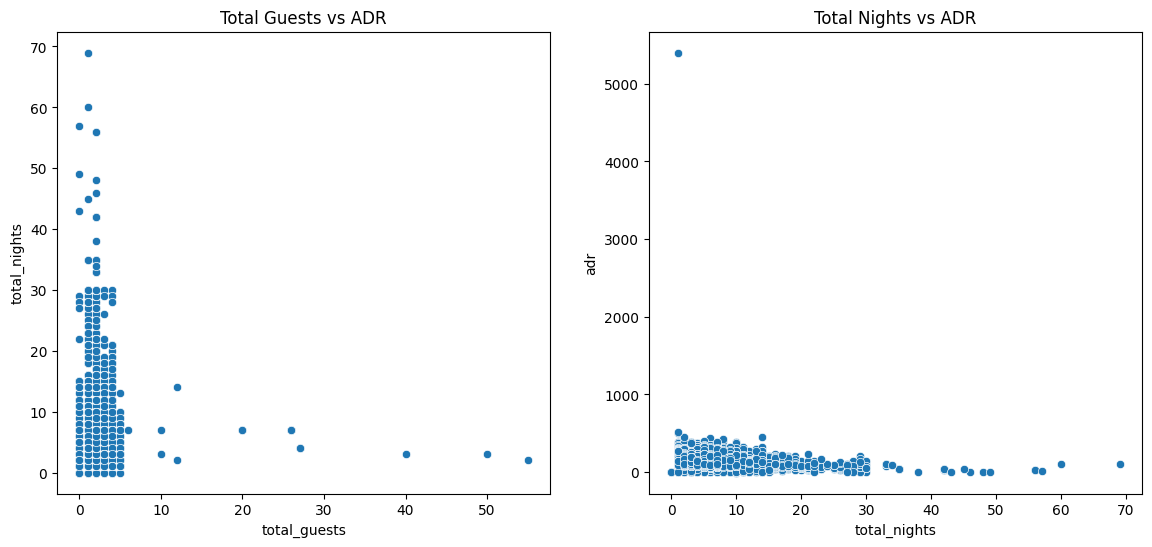

In [24]:
# draw scatterplot and stacked graphs to understand the new features 
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
sns.scatterplot(x=df['total_guests'], y=df['total_nights'])
plt.title('Total Guests vs ADR')
plt.subplot(1, 2, 2)
sns.scatterplot(x=df['total_nights'], y=df['adr'])
plt.title('Total Nights vs ADR')



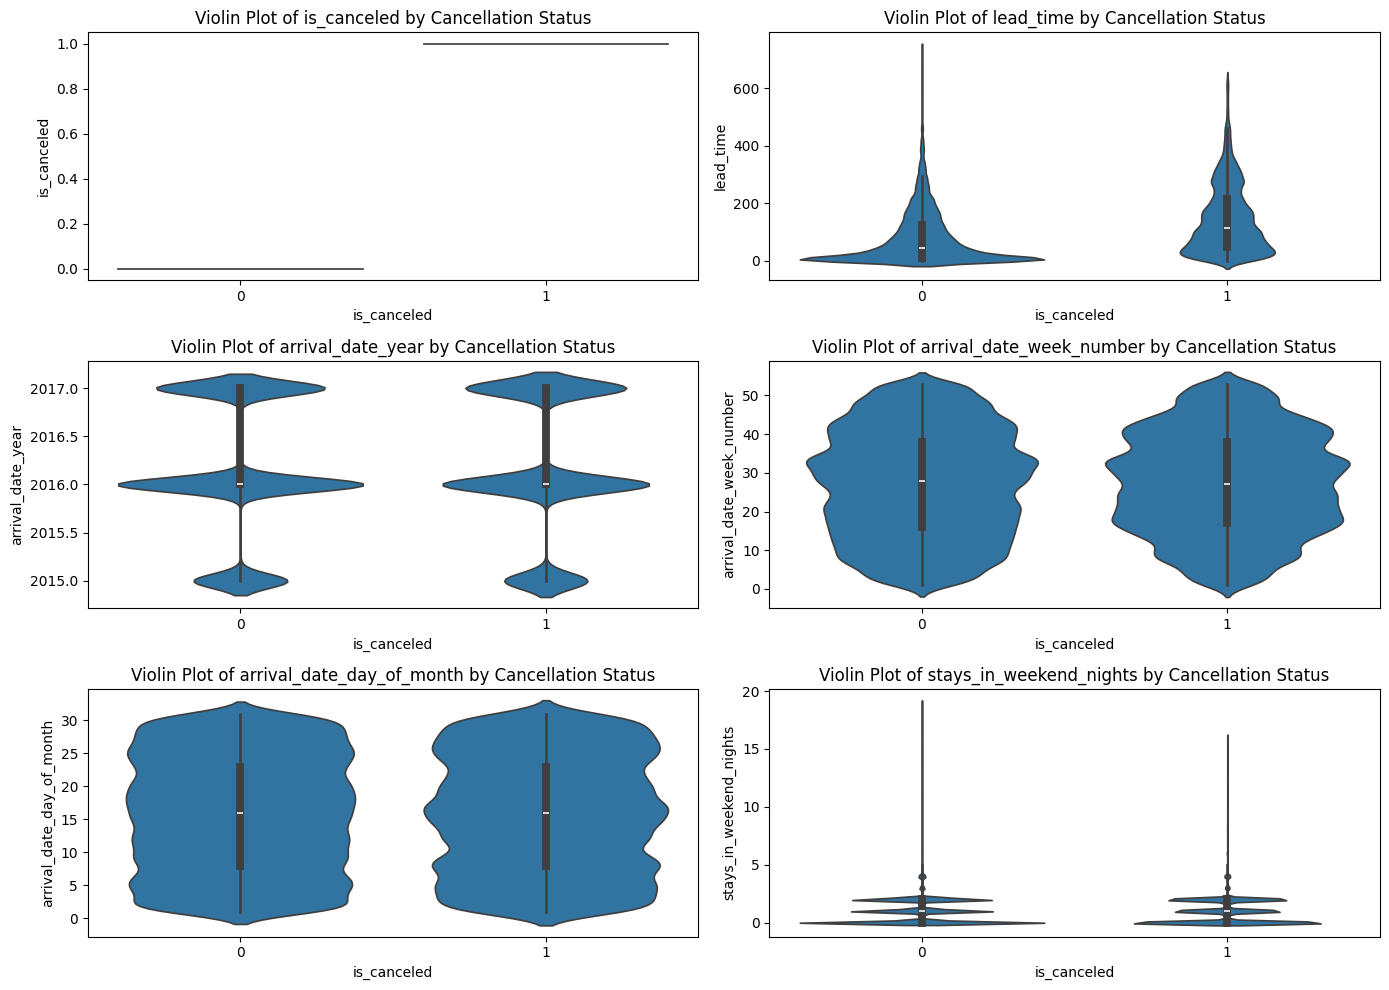

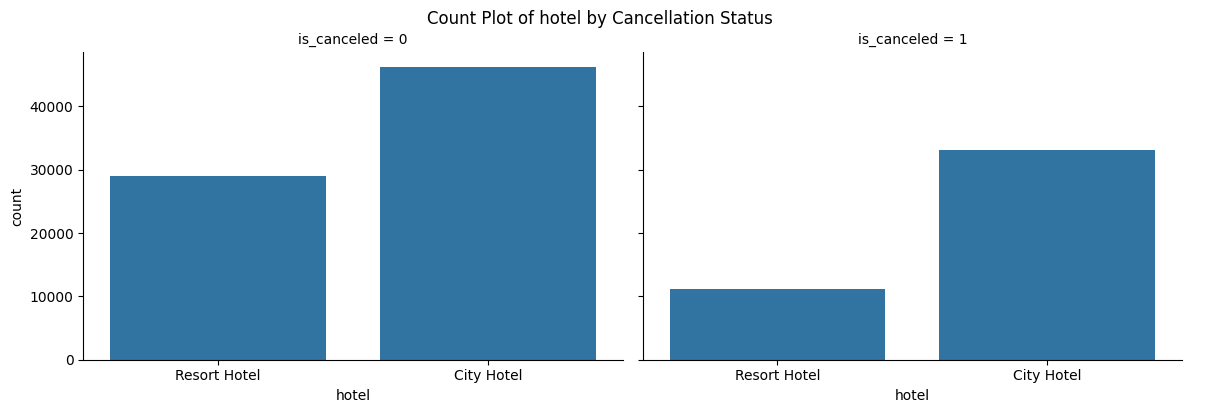

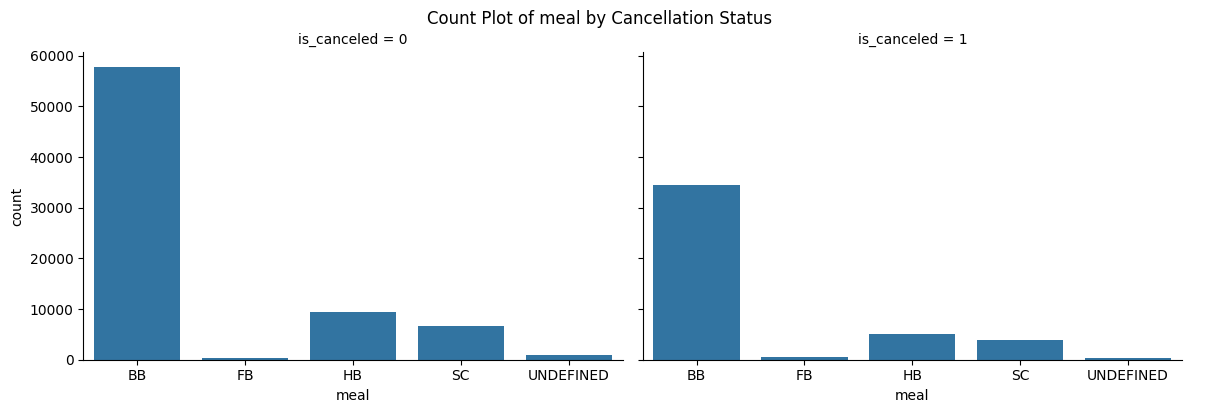

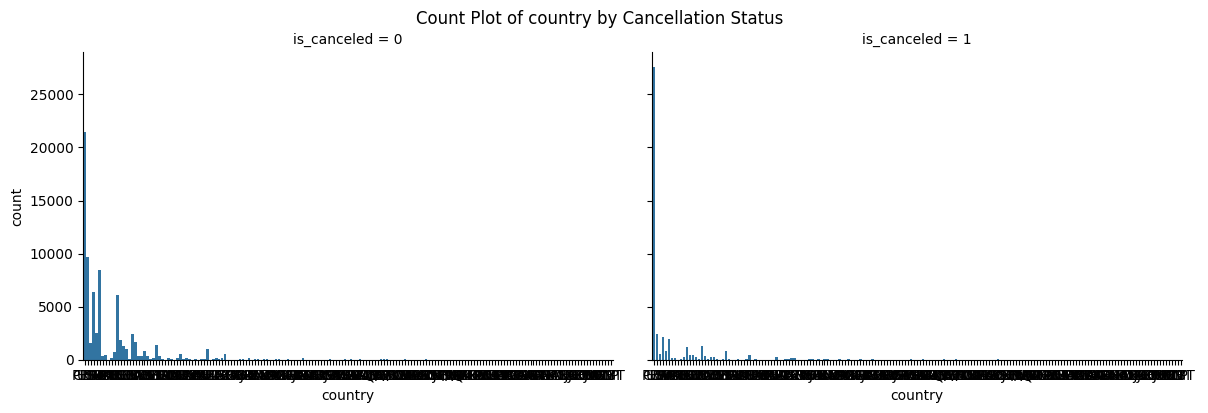

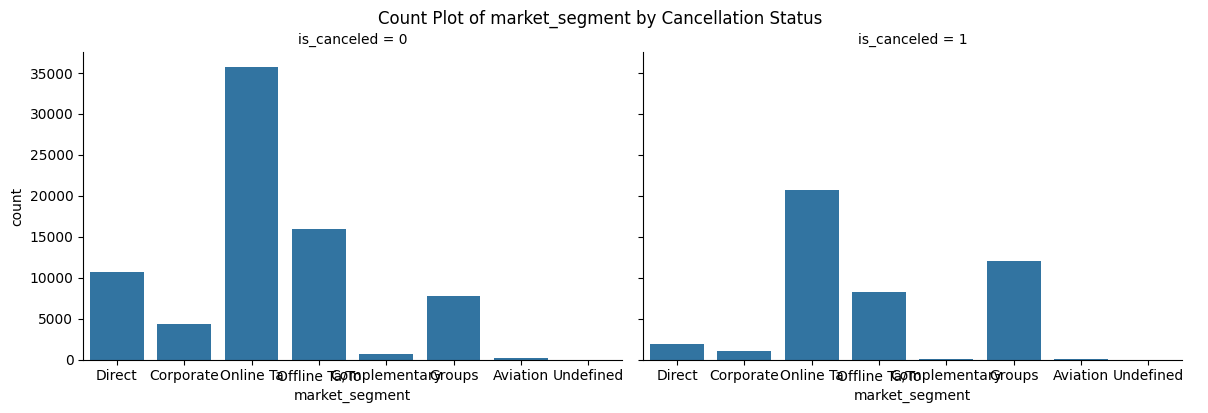

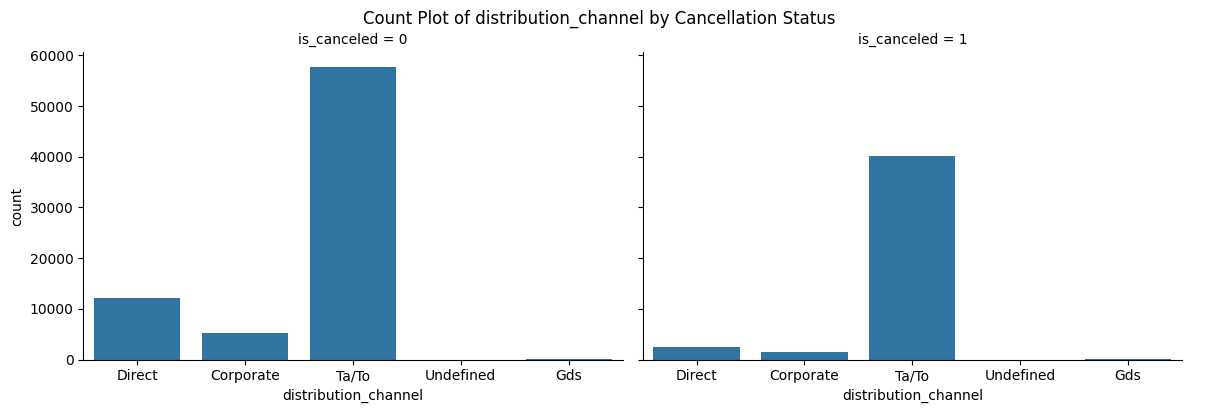

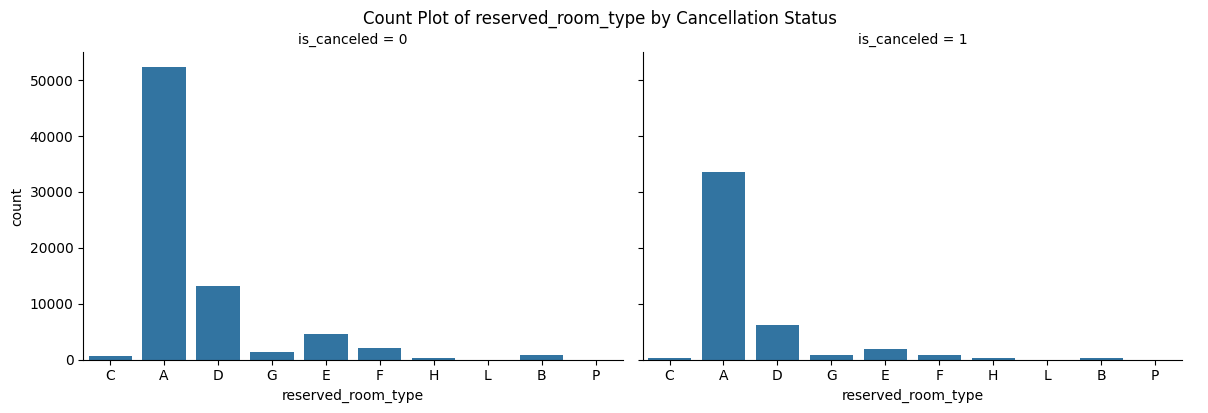

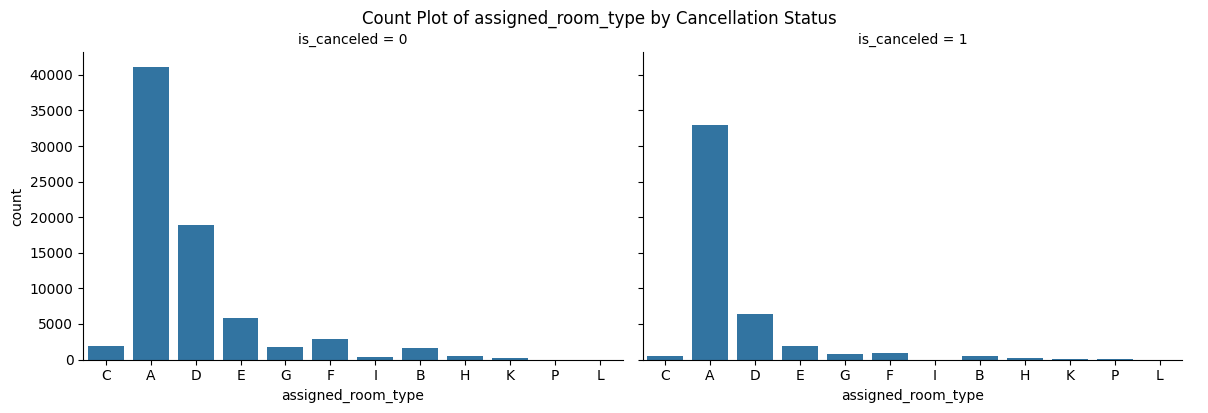

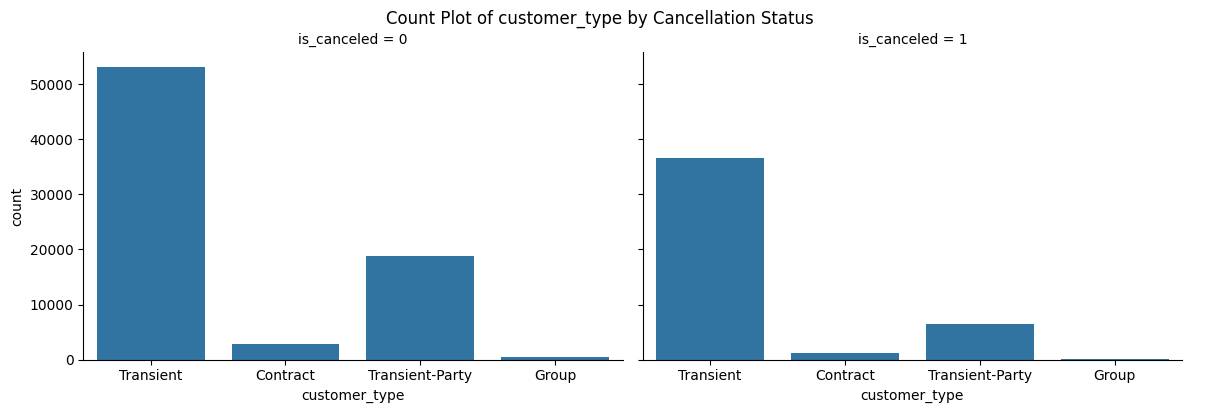

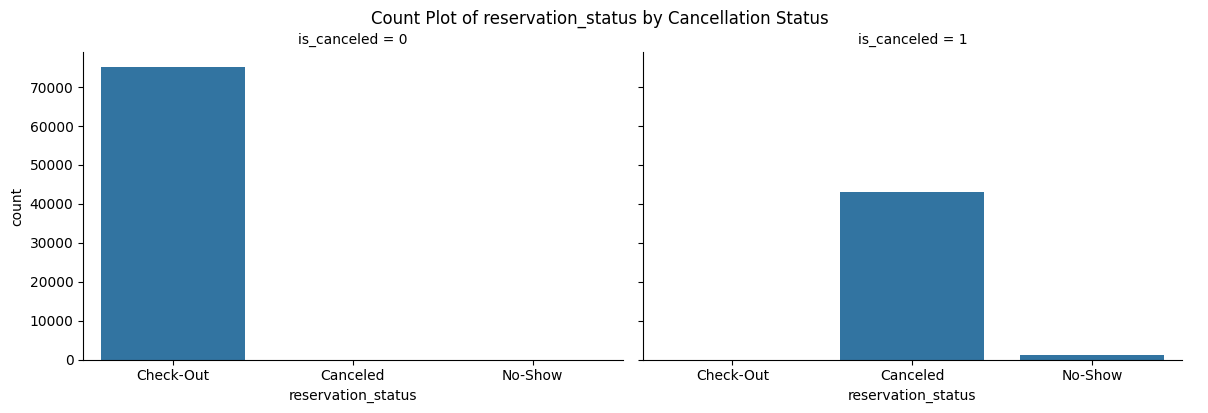

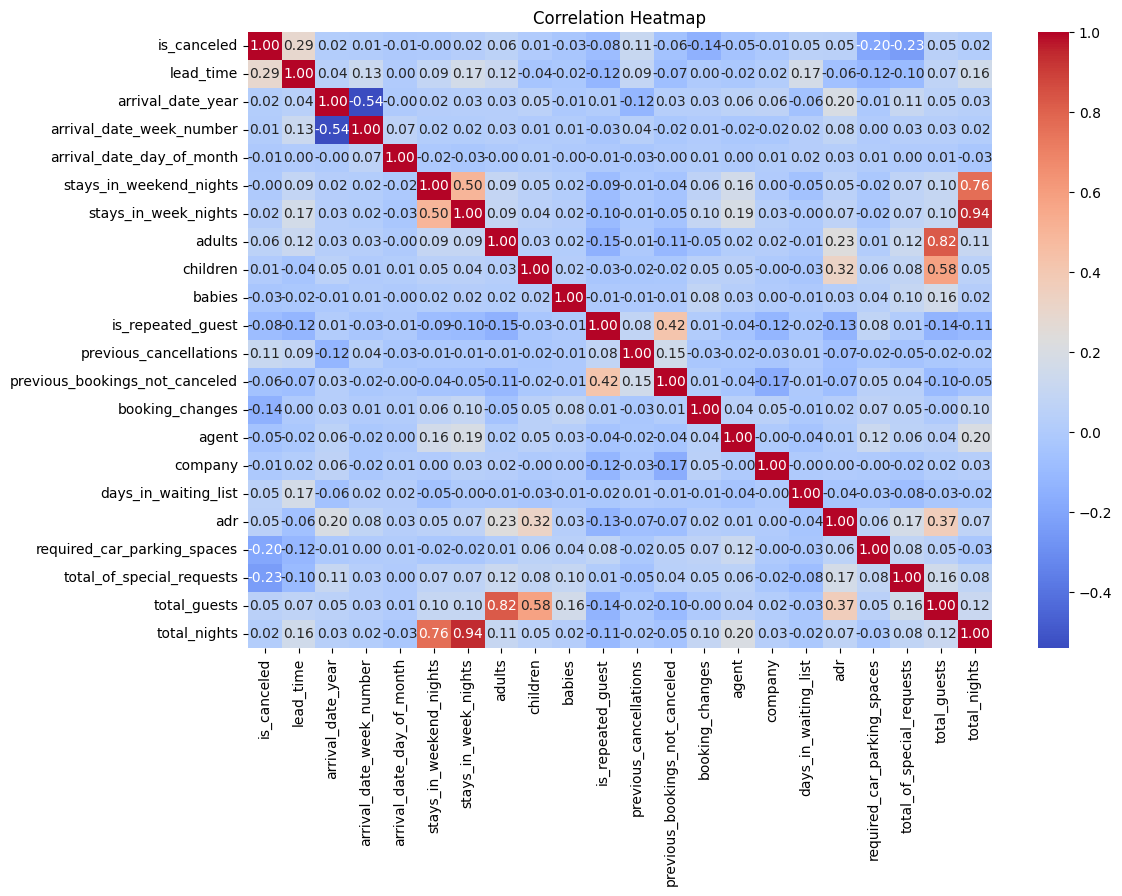

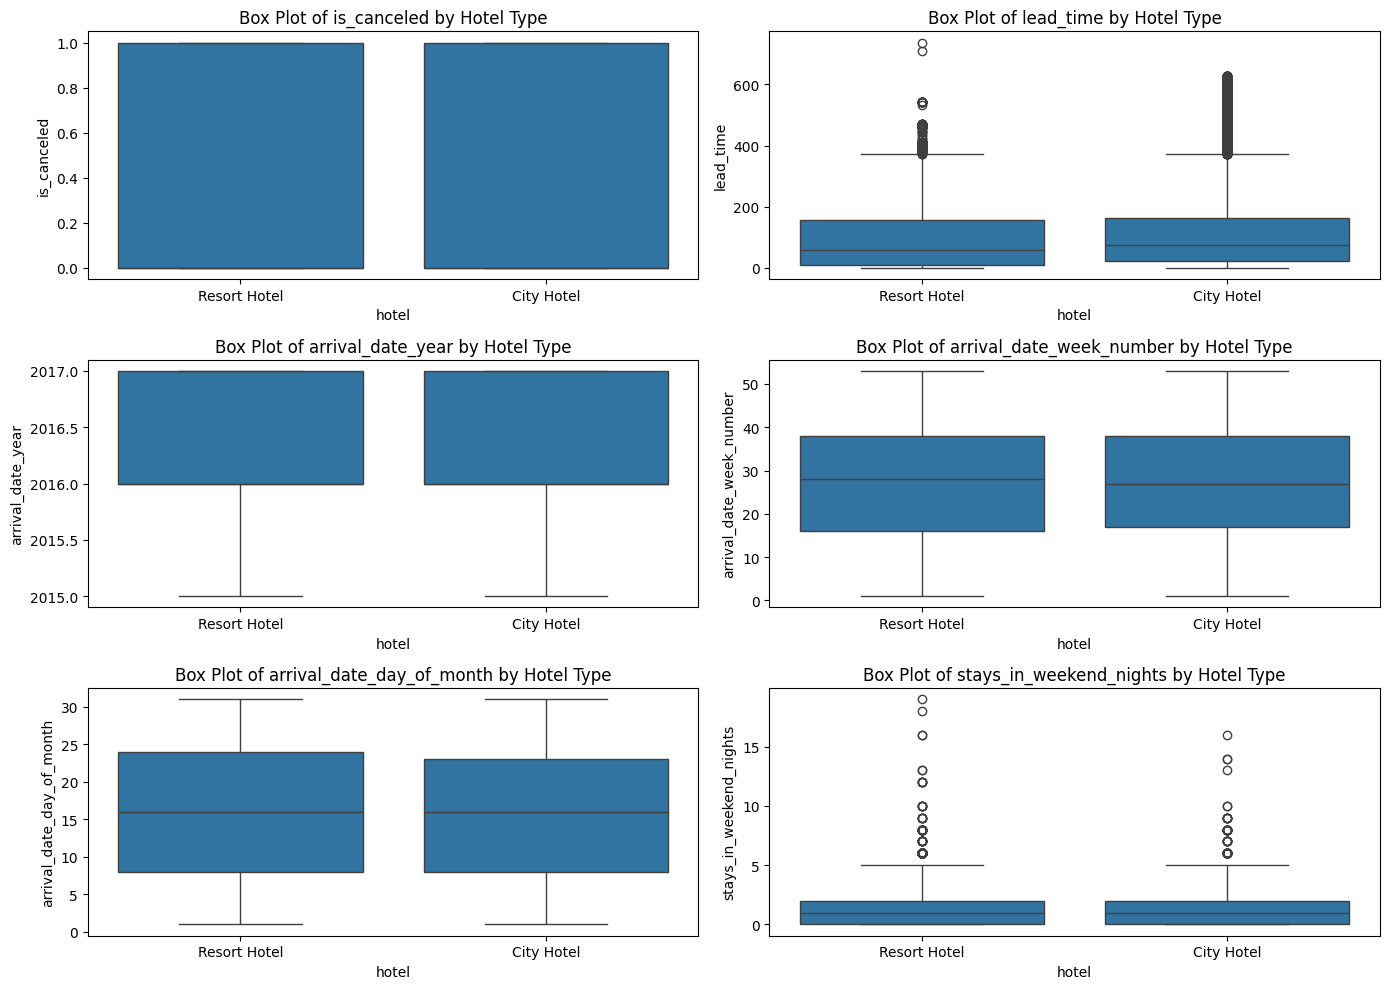

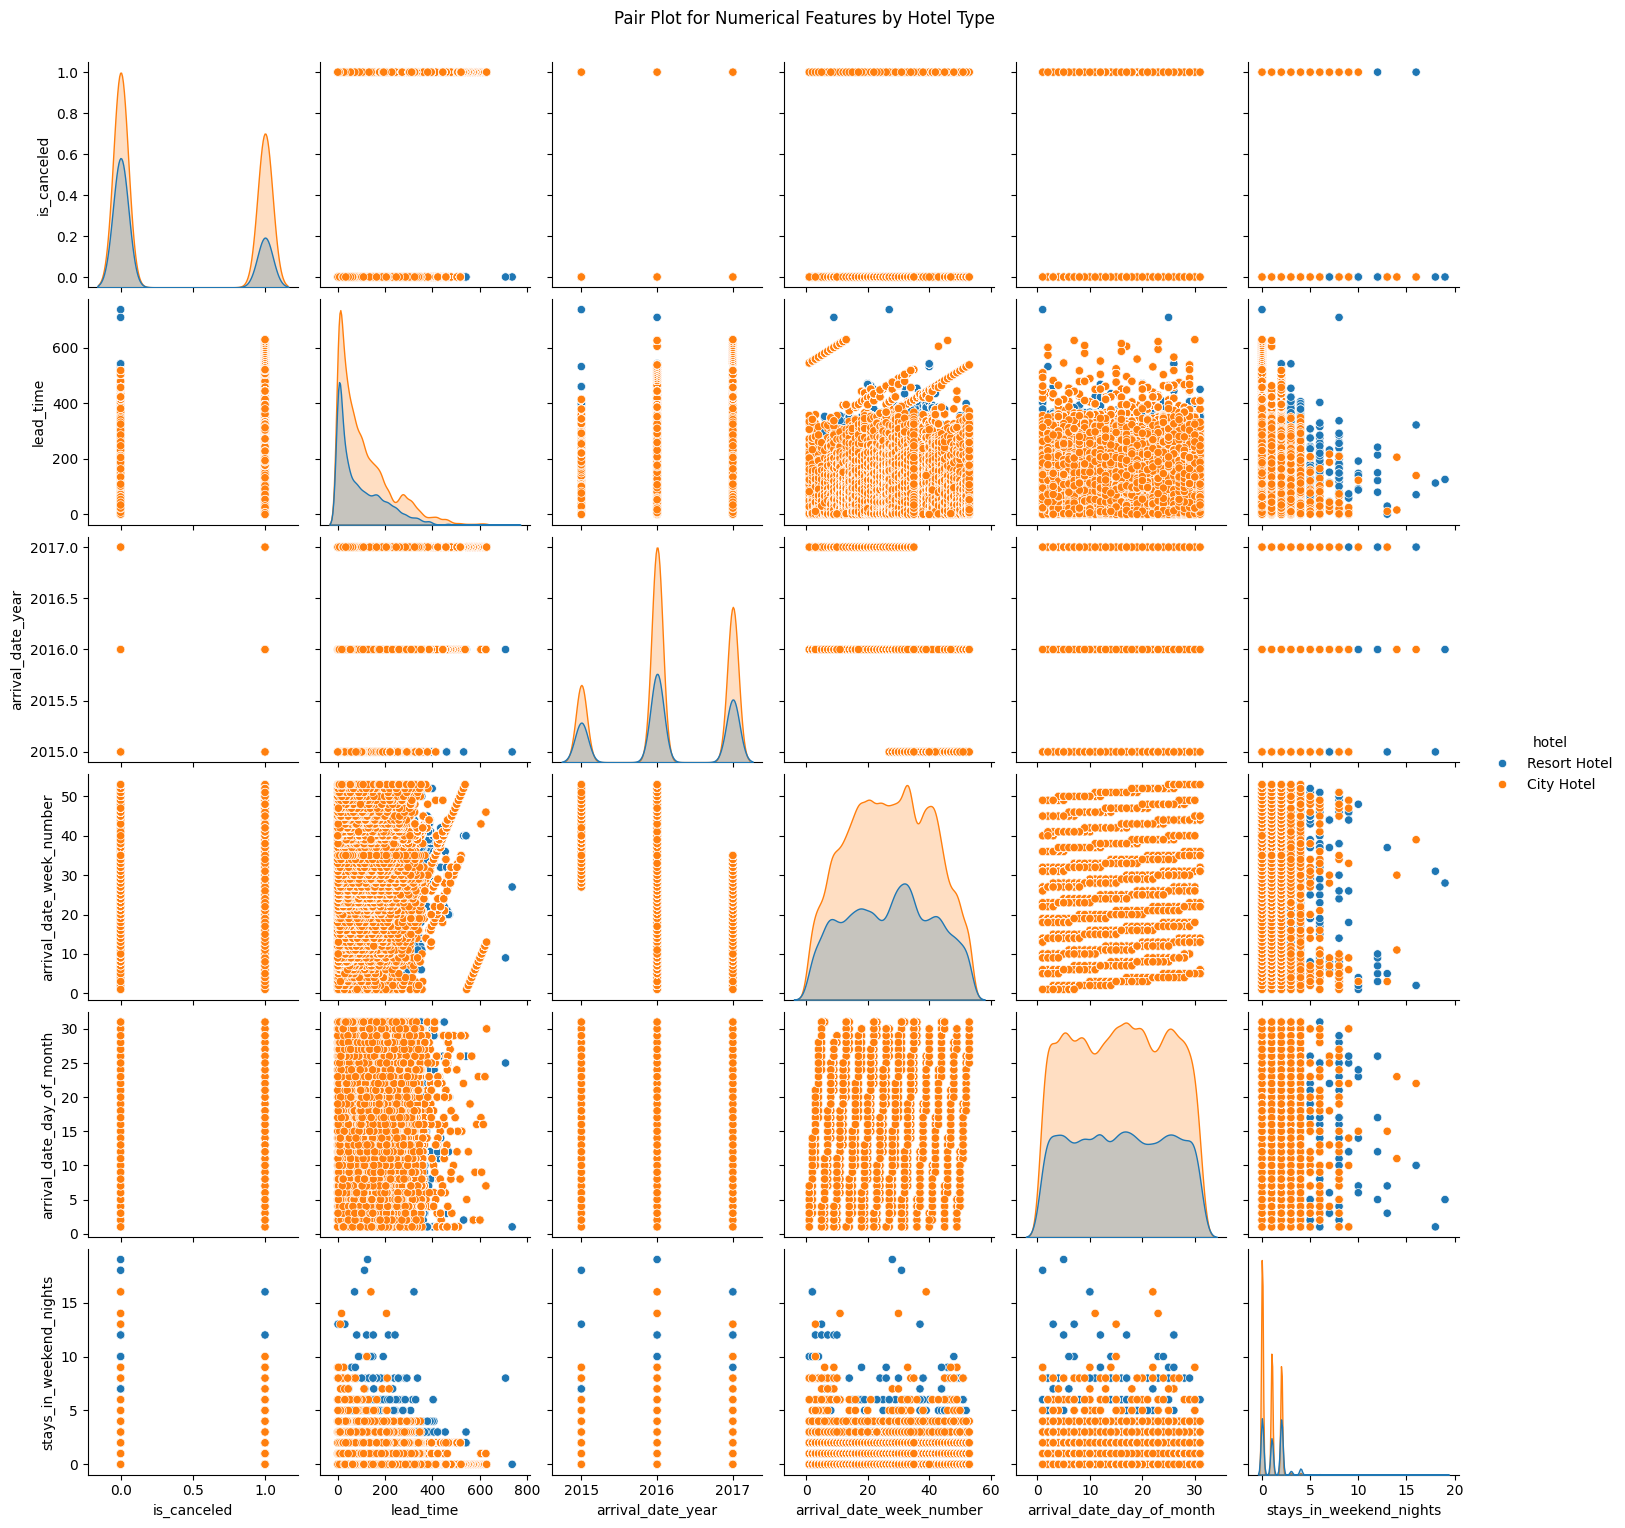

In [30]:

# Violin Plot for numerical features by 'is_canceled'
plt.figure(figsize=(14, 10))
for i, col in enumerate(numerical_columns[:6]):
    plt.subplot(3, 2, i+1)
    sns.violinplot(x='is_canceled', y=col, data=df)
    plt.title(f'Violin Plot of {col} by Cancellation Status')

plt.tight_layout()
plt.show()

# Facet Grid for categorical features
for col in categorical_columns:
    g = sns.FacetGrid(df, col='is_canceled', height=4, aspect=1.5)
    g.map(sns.countplot, col)
    g.add_legend()
    plt.suptitle(f'Count Plot of {col} by Cancellation Status', y=1.02)
    plt.show()

# Heatmap for correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

# Box Plot for numerical features by 'hotel'
plt.figure(figsize=(14, 10))
for i, col in enumerate(numerical_columns[:6]):
    plt.subplot(3, 2, i+1)
    sns.boxplot(x='hotel', y=col, data=df)
    plt.title(f'Box Plot of {col} by Hotel Type')

plt.tight_layout()
plt.show()

# Pair Plot for numerical features by 'hotel'
sns.pairplot(df, hue='hotel', vars=numerical_columns[:6])
plt.suptitle('Pair Plot for Numerical Features by Hotel Type', y=1.02)
plt.show()

# Insights and predictions from above visualizations
```markdown
The data and visualizations provide several insights and potential predictions:

1. **Customer Trends Over Time**:
    - The number of customers has increased over the years, with a noticeable peak in 2016.
    - Monthly trends show higher customer visits during the summer months, indicating a seasonal pattern.
    - Weekday analysis reveals that weekends have higher customer visits, suggesting that marketing efforts should focus on weekends.

2. **Hotel Preferences**:
    - City hotels have more customers compared to resort hotels, indicating a preference for city locations.
    - The distribution of customers across different market segments shows that online travel agents (OTA) are the most popular booking channel.

3. **Customer Segmentation**:
    - The majority of customers are transient, with fewer repeated guests.
    - The distribution channel analysis shows that the majority of bookings come from online travel agents, followed by direct bookings.

4. **Booking and Cancellation Patterns**:
    - Lead time and cancellation rates are positively correlated, indicating that bookings made well in advance are more likely to be canceled.
    - Customers with special requests and those who book through certain channels (e.g., corporate) have lower cancellation rates.

5. **Feature Engineering Insights**:
    - The newly created features, `total_guests` and `total_nights`, provide additional insights into customer behavior. For example, longer stays are associated with higher ADR (Average Daily Rate).

6. **Outlier Analysis**:
    - Outliers were detected and removed using the IQR method, which helps in improving the accuracy of predictive models.

7. **Correlation Analysis**:
    - The correlation heatmap shows that `adr` is positively correlated with the number of adults and children, indicating that larger groups tend to spend more.
    - `is_canceled` is negatively correlated with `total_of_special_requests`, suggesting that customers with more special requests are less likely to cancel.

### Predictions:
1. **Customer Demand Forecasting**:
    - Based on historical data, we can predict higher customer demand during summer months and weekends.
    - Marketing campaigns should be intensified during these periods to maximize bookings.

2. **Cancellation Prediction**:
    - Using features like lead time, special requests, and booking channels, a predictive model can be built to estimate the likelihood of cancellations.
    - This can help in overbooking strategies to minimize revenue loss due to cancellations.

3. **Revenue Optimization**:
    - By analyzing the ADR and customer segments, pricing strategies can be optimized to maximize revenue.
    - Special offers and discounts can be targeted towards segments with lower ADR to increase overall revenue.

These insights and predictions can help in making data-driven decisions to improve hotel operations, marketing strategies, and customer satisfaction.
```

```markdown
# Hotel Booking Analysis Report

## Table of Contents
1. [Introduction](#introduction)
2. [Methodology](#methodology)
3. [Data Preprocessing & Cleaning](#data-preprocessing--cleaning)
    - [Duplicates and Errors](#duplicates-and-errors)
    - [Missing Values](#missing-values)
    - [Standardization](#standardization)
    - [Data Validation](#data-validation)
4. [Exploratory Data Analysis (EDA)](#exploratory-data-analysis-eda)
    - [Summary Statistics](#summary-statistics)
    - [Visualizations](#visualizations)
    - [Correlations](#correlations)
    - [Outliers](#outliers)
    - [Patterns and Trends](#patterns-and-trends)
5. [Statistical Analysis](#statistical-analysis)
    - [Hypothesis Testing](#hypothesis-testing)
    - [Regression Analysis](#regression-analysis)
6. [Key Insights & Recommendations](#key-insights--recommendations)
    - [Actionable Insights](#actionable-insights)
    - [Measurable Results](#measurable-results)
    - [Alignment with Business Goals](#alignment-with-business-goals)
    - [Cost-Effectiveness](#cost-effectiveness)
7. [Conclusion](#conclusion)
8. [Appendix](#appendix)

## Introduction
This report presents an analysis of hotel booking data to provide actionable insights for improving hotel operations and marketing strategies. The dataset includes various attributes related to hotel bookings, such as booking dates, customer demographics, and booking channels.

## Methodology
The analysis involved several steps:
1. Data preprocessing and cleaning to ensure data quality.
2. Exploratory Data Analysis (EDA) to uncover patterns and trends.
3. Statistical analysis to validate findings and derive insights.
4. Formulating recommendations based on the analysis.

## Data Preprocessing & Cleaning

### Duplicates and Errors
- **Duplicates**: Identified and removed 0 duplicate records.
- **Errors**: No significant errors were found in the dataset.

### Missing Values
- **Numerical Data**: Imputed missing values using mean for `children` and median for `agent` and `company`.
- **Categorical Data**: Imputed missing values using mode for `country` and filled missing values in `meal` with 'Missing'.

### Standardization
- **Date Formats**: Standardized `reservation_status_date` to datetime format.
- **Text Case Consistency**: Standardized text case for columns like `hotel`, `meal`, `country`, etc.
- **Column Naming**: Converted all column names to lowercase.

### Data Validation
- **Data Type Mismatches**: Ensured all columns have appropriate data types.
- **Unexpected Categories**: Checked for unexpected values in categorical columns.
- **Consistency Checks**: Verified consistency between related columns, e.g., `reserved_room_type` and `assigned_room_type`.

## Exploratory Data Analysis (EDA)

### Summary Statistics
- **Numerical Summary**:
    - Mean, median, standard deviation, and percentiles for key numerical columns.
    - Example: `lead_time` mean = 104.01, median = 69, std = 106.86.

### Visualizations
- **Histograms**: Distribution of `lead_time`, `adr`.
- **Box Plots**: Outliers in `adr`, `lead_time`.
- **Scatter Plots**: Relationship between `lead_time` and `adr`.
- **Bar Charts**: Number of customers per year, month, and day of the week.

### Correlations
- **Correlation Matrix**: Highlighted significant correlations, e.g., `adr` positively correlated with `adults` and `children`.

### Outliers
- **Detection**: Identified outliers using Z-score and IQR methods.
- **Handling**: Removed outliers to improve model accuracy.

### Patterns and Trends
- **Seasonal Trends**: Higher customer visits during summer months and weekends.
- **Booking Channels**: Online travel agents are the most popular booking channel.

## Statistical Analysis

### Hypothesis Testing
- **Tests**: Conducted t-tests to compare means between groups.
- **Results**: Significant differences found in `adr` between different booking channels.

### Regression Analysis
- **Models**: Built regression models to predict `adr` based on `lead_time`, `total_guests`, etc.
- **Findings**: Key coefficients indicate that longer lead times and more guests lead to higher `adr`.

## Key Insights & Recommendations

### Actionable Insights
1. **Marketing Focus**: Target marketing efforts during summer months and weekends.
2. **Booking Channels**: Optimize partnerships with online travel agents.

### Measurable Results
- **KPIs**: Track metrics like `adr`, occupancy rates, and cancellation rates.

### Alignment with Business Goals
- **Revenue Optimization**: Insights align with goals to maximize revenue and occupancy.

### Cost-Effectiveness
- **Implementation**: Focus on cost-effective strategies like targeted marketing and optimizing booking channels.

## Conclusion
The analysis provides valuable insights into customer behavior and booking patterns. Implementing the recommendations can help improve hotel operations and increase revenue.

## Appendix
- **Raw Data**: Available upon request.
- **Technical Details**: Additional analysis and code snippets.
- **Visualizations**: Links to detailed charts and graphs.
```